In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'netflix_customer_churn.csv')

In [13]:
# 2. Display dataset before preprocessing
print('Dataset before preprocessing:')
display(df.head())

# Handle missing values (fill with mean for numeric columns)
df_filled = df.fillna(df.mean(numeric_only=True))

print('Dataset after preprocessing:')
display(df_filled.head())



Dataset before preprocessing:


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


Dataset after preprocessing:


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [14]:
# 3. Standardize the dataset using the formula: (X - mean) / std
numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
X = df_filled[numeric_cols].values
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_std = (X - means) / stds

print('Standardized Data:')
print(pd.DataFrame(X_std, columns=numeric_cols).head())



Standardized Data:
        age  watch_hours  last_login_days  monthly_fee   churned  \
0  0.461471     0.256425        -0.062152    -1.271341  0.994018   
1  0.203399    -0.911432        -0.632462     0.083051  0.994018   
2 -1.086959     0.388777        -1.145741     0.083051 -1.006018   
3  0.590506    -0.594288        -1.031679     1.166565  0.994018   
4  0.784060    -0.812377        -0.974648     0.083051  0.994018   

   number_of_profiles  avg_watch_time_per_day  
0           -1.429965               -0.146895  
1            1.395494               -0.322497  
2           -0.723600                0.231031  
3           -0.723600               -0.200339  
4           -0.723600               -0.284322  


In [15]:
# 4. Calculate the covariance matrix (without using built-in function)
n_samples = X_std.shape[0]
cov_matrix = (X_std.T @ X_std) / (n_samples - 1)
print('Covariance Matrix:')
print(pd.DataFrame(cov_matrix, columns=numeric_cols, index=numeric_cols))



Covariance Matrix:
                             age  watch_hours  last_login_days  monthly_fee  \
age                     1.000200     0.031546         0.016773    -0.013945   
watch_hours             0.031546     1.000200         0.001698     0.004961   
last_login_days         0.016773     0.001698         1.000200    -0.000789   
monthly_fee            -0.013945     0.004961        -0.000789     1.000200   
churned                -0.003516    -0.480012         0.471684    -0.152148   
number_of_profiles      0.017336     0.016532         0.017246     0.021909   
avg_watch_time_per_day  0.010357     0.349812        -0.338486    -0.010404   

                         churned  number_of_profiles  avg_watch_time_per_day  
age                    -0.003516            0.017336                0.010357  
watch_hours            -0.480012            0.016532                0.349812  
last_login_days         0.471684            0.017246               -0.338486  
monthly_fee            -0.152148

In [16]:
# 5. Calculate eigenvalues and eigenvectors (without using built-in function)
def power_iteration(A, num_simulations: int):
    b_k = np.random.rand(A.shape[1])
    for _ in range(num_simulations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    eigenvalue = b_k.T @ A @ b_k
    return eigenvalue, b_k

def get_all_eigen(A, num_eigen):
    A_copy = A.copy()
    eigenvalues = []
    eigenvectors = []
    for _ in range(num_eigen):
        val, vec = power_iteration(A_copy, 1000)
        eigenvalues.append(val)
        eigenvectors.append(vec)
        # Deflation
        A_copy = A_copy - val * np.outer(vec, vec)
    return np.array(eigenvalues), np.array(eigenvectors)

num_features = cov_matrix.shape[0]
eigenvalues, eigenvectors = get_all_eigen(cov_matrix, num_features)

print('Eigenvalues:')
print(eigenvalues)
print('Eigenvectors:')
print(eigenvectors)



Eigenvalues:
[1.99027893 1.07838968 1.04306099 0.97143716 0.96194959 0.69718064
 0.25910329]
Eigenvectors:
[[-0.01456537 -0.4571906   0.44235194 -0.09069969  0.59294115 -0.09660293
  -0.47534367]
 [ 0.10616878  0.07943968  0.28826029  0.58130757 -0.19194746  0.66097902
  -0.29608775]
 [ 0.6697527   0.4313242   0.40477231 -0.42009774  0.07657469  0.09913322
   0.0968346 ]
 [ 0.20349349 -0.46335917 -0.44028404 -0.45201292 -0.02980532  0.58584257
  -0.04028765]
 [ 0.70594787 -0.29655303 -0.29252853  0.44468812 -0.01051827 -0.35935489
  -0.03356887]
 [-0.01230295 -0.17536788  0.13168115  0.24881779  0.47045392  0.23431548
   0.78333511]
 [-0.00483266  0.51500058 -0.51051607  0.11576002  0.61918285  0.12921674
  -0.24625116]]


In [17]:
# 6. Sort eigenvalues and their corresponding eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[idx]

print('Sorted Eigenvalues:')
print(eigenvalues_sorted)



Sorted Eigenvalues:
[1.99027893 1.07838968 1.04306099 0.97143716 0.96194959 0.69718064
 0.25910329]


In [18]:
# 7. Pick k eigenvalues and form a matrix of eigenvectors (let's pick k=2 for visualization)
k = 2
top_k_eigenvectors = eigenvectors_sorted[:k].T  # shape: (features, k)
print('Top k eigenvectors (matrix):')
print(top_k_eigenvectors)



Top k eigenvectors (matrix):
[[-0.01456537  0.10616878]
 [-0.4571906   0.07943968]
 [ 0.44235194  0.28826029]
 [-0.09069969  0.58130757]
 [ 0.59294115 -0.19194746]
 [-0.09660293  0.66097902]
 [-0.47534367 -0.29608775]]


In [19]:
# 8. Transform the original matrix using the formula: feature matrix * top k eigenvectors
X_pca = X_std @ top_k_eigenvectors  
print(X_pca.shape)  # Print shape to verify transformation dimensions

(5000, 2)


/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_12902/2325265898.py:2: RuntimeWarning: divide by zero encountered in matmul
  X_pca = X_std @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_12902/2325265898.py:2: RuntimeWarning: overflow encountered in matmul
  X_pca = X_std @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_12902/2325265898.py:2: RuntimeWarning: invalid value encountered in matmul
  X_pca = X_std @ top_k_eigenvectors


In [ ]:
# 9. Display the transformed data
print('Transformed Data (first 5 rows):')
print(pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)]).head())


Transformed Data (first 5 rows):
        PC1       PC2
0  0.761219 -1.780074
1  0.734314  0.642236
2 -1.312693 -0.720097
3  0.455455 -0.213542
4  0.715767 -0.798866


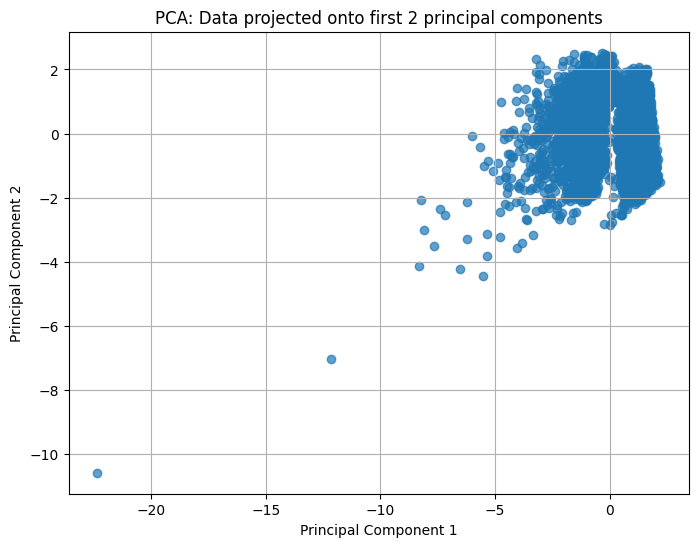

In [ ]:

# 10. Visualize the data in the reduced dimensional space
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data projected onto first 2 principal components')
plt.grid(True)
plt.show()